In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn import svm
from tensorflow.keras import layers
from tensorflow.keras import regularizers


In [2]:
# with open('/home/eslab_server/Desktop/new_features/syn_data16_mesh.txt','r') as my_file:
#     text = my_file.read()
#     text = text.replace("    ", " ")
#     text = text.replace("[", " ")
#     text = text.replace("]", " ")
#     text = text.replace(" ",",")
#     text = text.replace(",,,",",")
#     text = text.replace(",,",",")
#     text = text.replace(",,",",")
#     text = text.replace(",\n,\n,\n,",'\n')
#     text = text.replace('\n,',',')

# with open('/home/eslab_server/Desktop/new_features/syn_data16_mesh.csv','w+') as myfile:
#     myfile.write(text)

In [3]:
dataset = pd.read_csv("dataset/updated_model_dataset/Final_dataset/rand_vopd_dataset.csv",header=None,error_bad_lines=False)
# print('***************sample view of the data***************\n',dataset.head())
print('**********overall statistics*********************')
dataset.describe()

**********overall statistics*********************


,0,1,2,3,4,5,6,7,8,9,...,557,558,559,560,561,562,563,564,565,566
count,463936.000000,463936.000000,463936.0,463936.0,463936.0,463936.000000,463936.000000,463936.000000,463936.0,463936.0,...,463936.000000,463936.000000,463936.000000,463936.000000,463936.0,463936.0,463936.000000,463936.000000,463936.000000,463936.000000
mean,62607.629367,0.009987,4.0,1.0,15.0,0.004471,0.003558,0.003562,0.0,0.0,...,0.008616,0.008046,0.013796,0.011172,0.0,0.0,0.007792,0.008590,40.123882,39.274162
std,42148.086806,0.006217,0.0,0.0,0.0,0.004652,0.004135,0.004253,0.0,0.0,...,0.021262,0.019602,0.033618,0.024440,0.0,0.0,0.018657,0.023706,6.087344,4.400267
min,1.000000,0.001000,4.0,1.0,15.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,27.253900,29.390500
25%,29000.000000,0.005000,4.0,1.0,15.0,0.000776,0.000399,0.000151,0.0,0.0,...,0.000036,0.000035,0.000180,0.000122,0.0,0.0,0.000033,0.000005,35.506100,36.403300
50%,57999.000000,0.009500,4.0,1.0,15.0,0.002911,0.001934,0.002017,0.0,0.0,...,0.001027,0.000789,0.002351,0.001794,0.0,0.0,0.000775,0.000879,38.926600,38.288900
75%,87057.000000,0.013500,4.0,1.0,15.0,0.007000,0.005540,0.005530,0.0,0.0,...,0.007420,0.006987,0.011937,0.011211,0.0,0.0,0.006900,0.006925,43.445400,40.970600
max,199987.000000,0.030500,4.0,1.0,15.0,0.030000,0.030000,0.033239,0.0,0.0,...,0.588225,0.433443,0.624069,0.482956,0.0,0.0,0.421430,0.597510,62.901900,69.918600


In [4]:
# X_train = dataset.sample(frac=0.8,random_state=0)
X_train = dataset.sample(frac=0.99,random_state=0)
Y_train = X_train.iloc[:,-1]
X_train.drop(X_train.columns[-1],inplace=True,axis=1)
X_train.drop(X_train.columns[0],inplace=True,axis=1)
# X_train.drop(X_train.columns[-1],inplace=True,axis=1)
train_stats = X_train.describe()
train_stats = train_stats.transpose()

In [5]:
X_train.iloc[:,-1]

171193    39.1109
366134    39.8106
407244    45.6721
256664    44.0840
363083    39.4462
           ...   
399007    44.3403
128977    37.2977
393863    43.5683
363556    39.5018
389826    42.9687
Name: 565, Length: 459297, dtype: float64

In [6]:
# train_stats.to_pickle('saved_models/model1_old_stat.pkl') 
   
# df1 = pd.read_pickle('train_stats.pkl') 

In [7]:
# for loc,val in enumerate(Y_train):
#     if(val > 250):
#         Y_train[loc]=250


In [8]:
def norm(x):
    return (x - train_stats['mean']) / (train_stats['std']+0.0000001)
def log_norm(x):
    for col in x.columns:
        x.iloc[:,col] = (x.iloc[:,col] - x.iloc[:,col].min()+1).transform(np.log10)
    
    return x
normed_train_data = norm(X_train)

# normed_train_data.drop(normed_train_data.columns[-1],inplace=True,axis=1)

# normed_test_data = norm(X_test)

In [9]:
# Y_train = normed_train_data.iloc[:,-1]
# normed_train_data.drop(normed_train_data.columns[-1],inplace=True,axis=1)
# Y_train_norm = np.log10(Y_train)

In [10]:
def build_model(lr_rate):
    model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation=tf.nn.relu, input_dim=normed_train_data.shape[1]),
#     layers.Dropout(0.5),
#     layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),activation=tf.nn.relu),
#     layers.Dropout(0.5),

#     layers.Dense(512,kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu),
#     layers.Dropout(0.5),

#     layers.Dense(512,kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu),
#     layers.Dropout(0.5),

    layers.Dense(256,kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu),
#     layers.Dropout(0.5),
    layers.Dense(128,kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu),
#     layers.Dropout(0.5),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu),
#     layers.Dropout(0.5),
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu),
#     layers.Dropout(0.5),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.Adam(lr=lr_rate)

    model.compile(loss='mean_squared_error',optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [11]:
lr_rate = 0.001

model = build_model(lr_rate)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               289792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 464,385
Trainable params: 464,385
Non-trai

/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', mode = 'min',patience=5)
# mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(normed_train_data, Y_train,
          epochs=300, validation_split = 0.3, verbose=1,callbacks=[early_stop])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

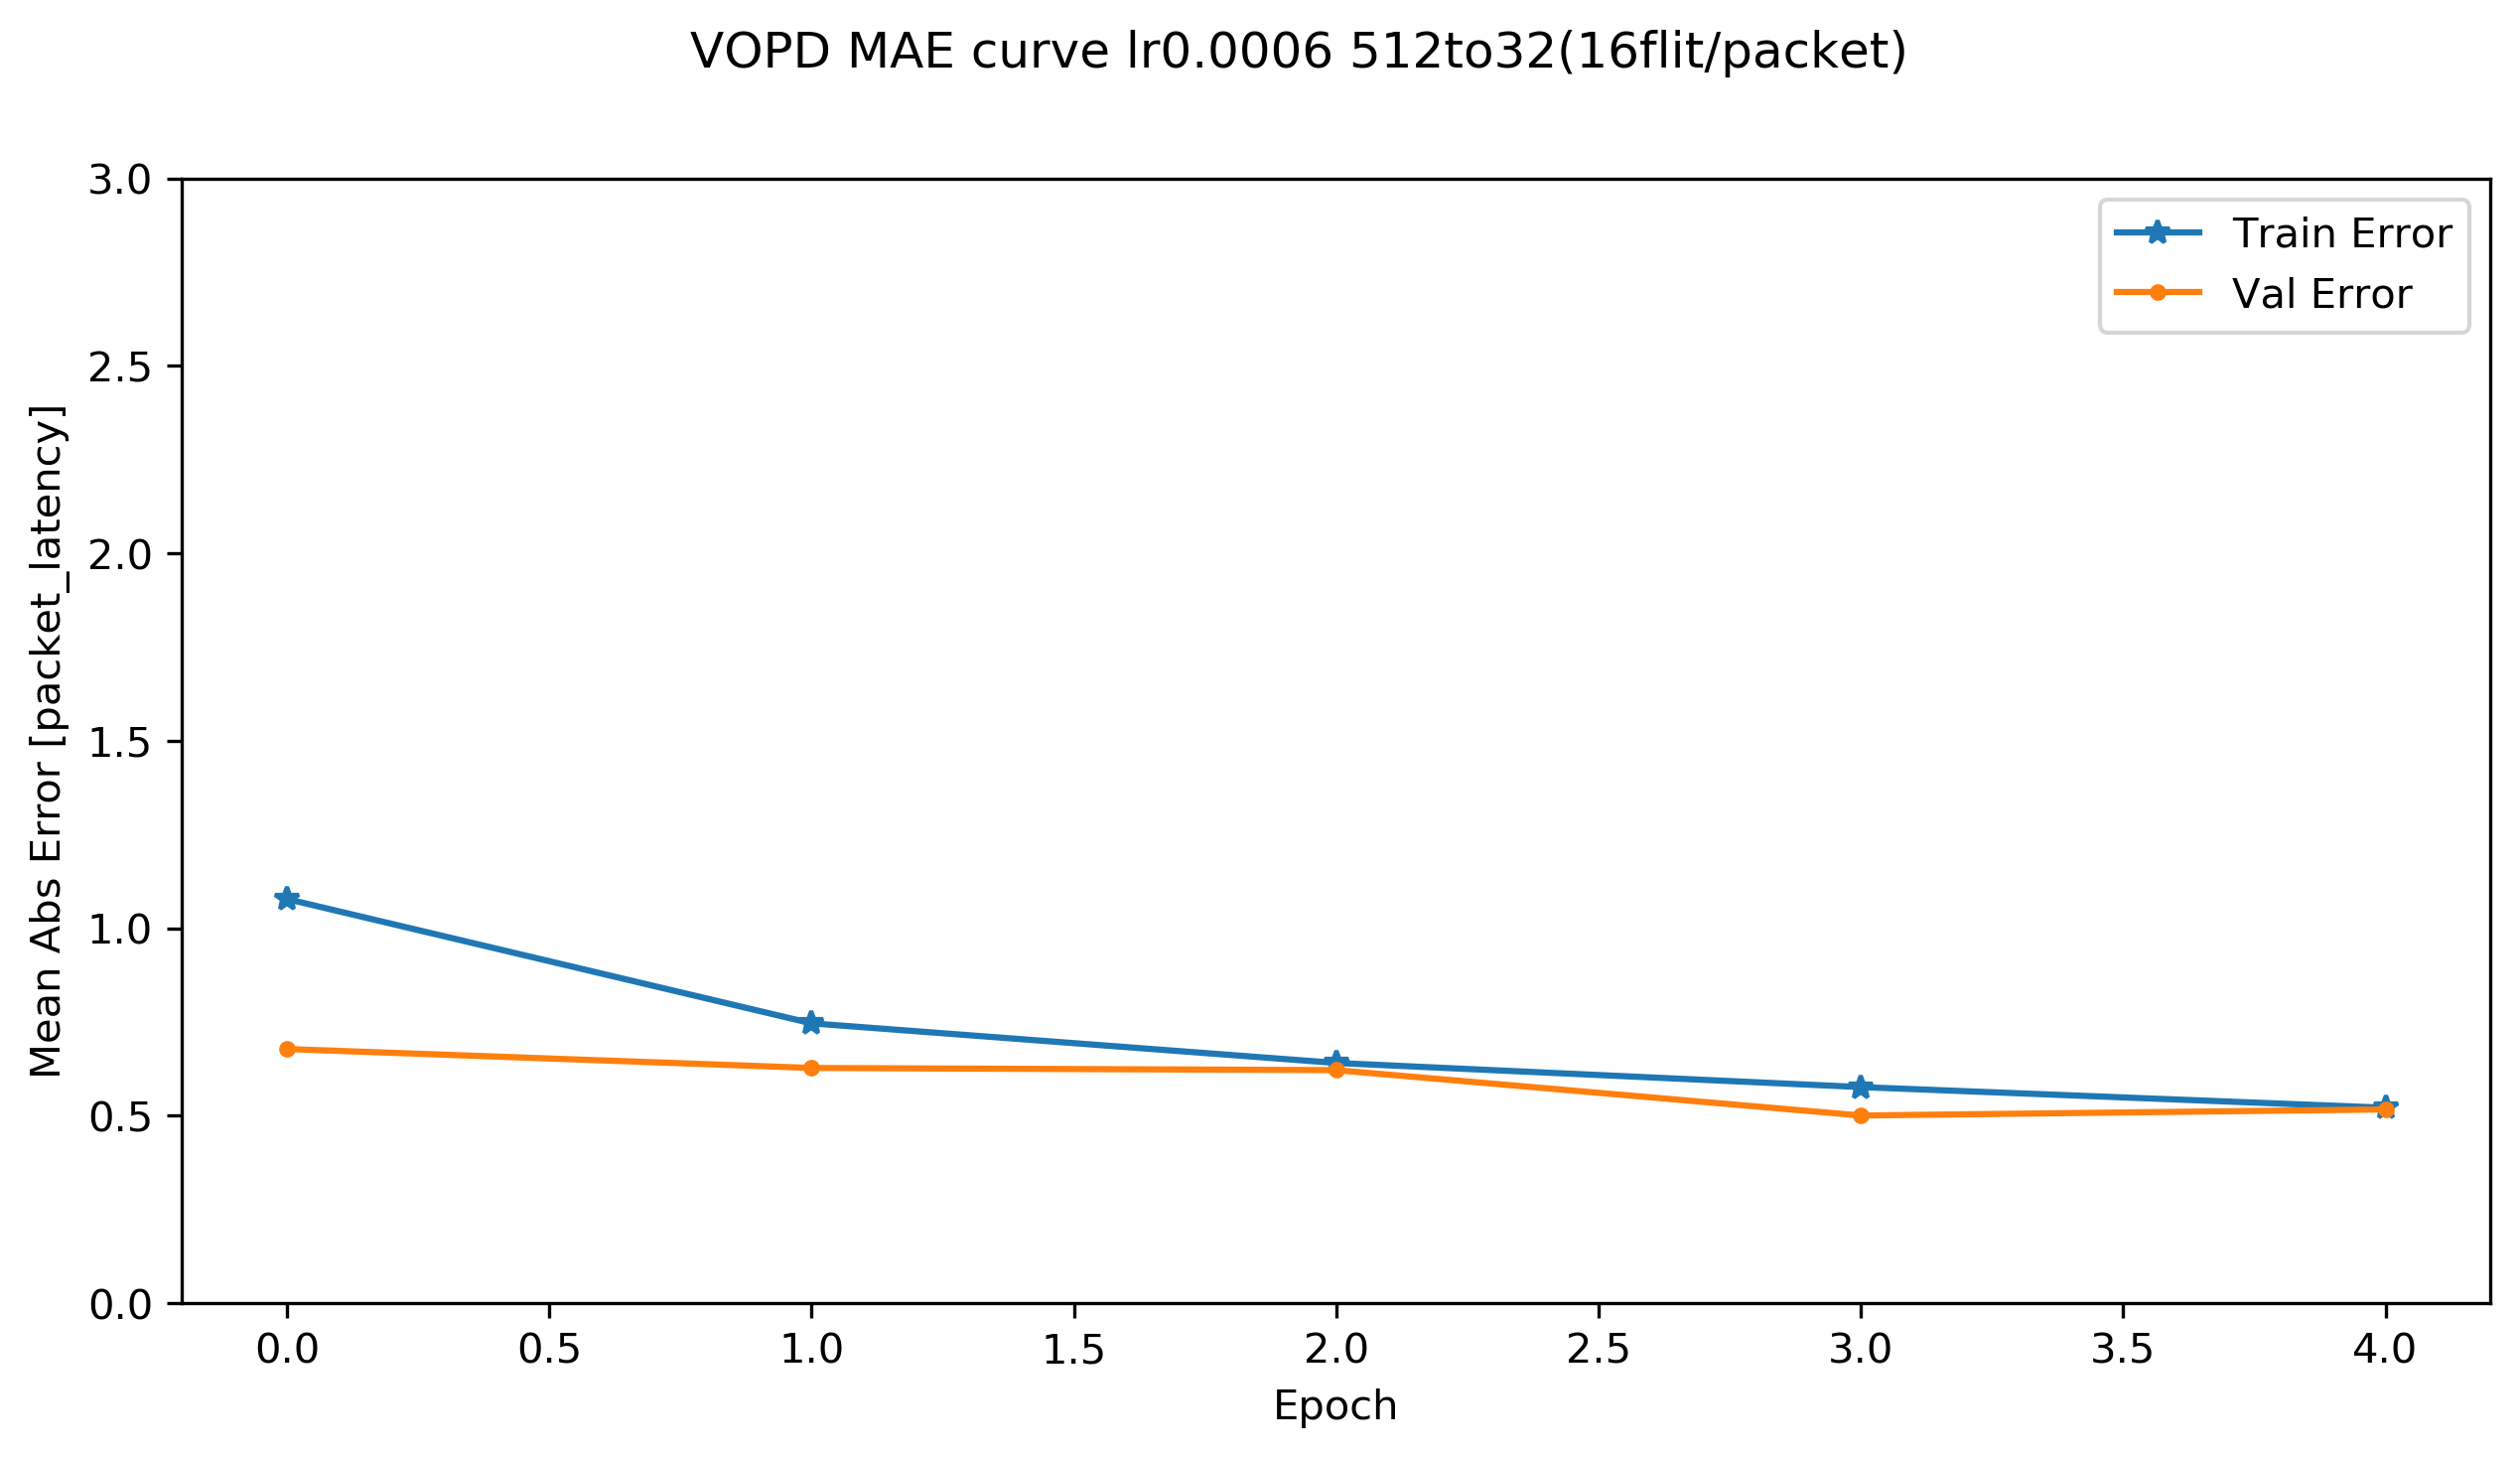

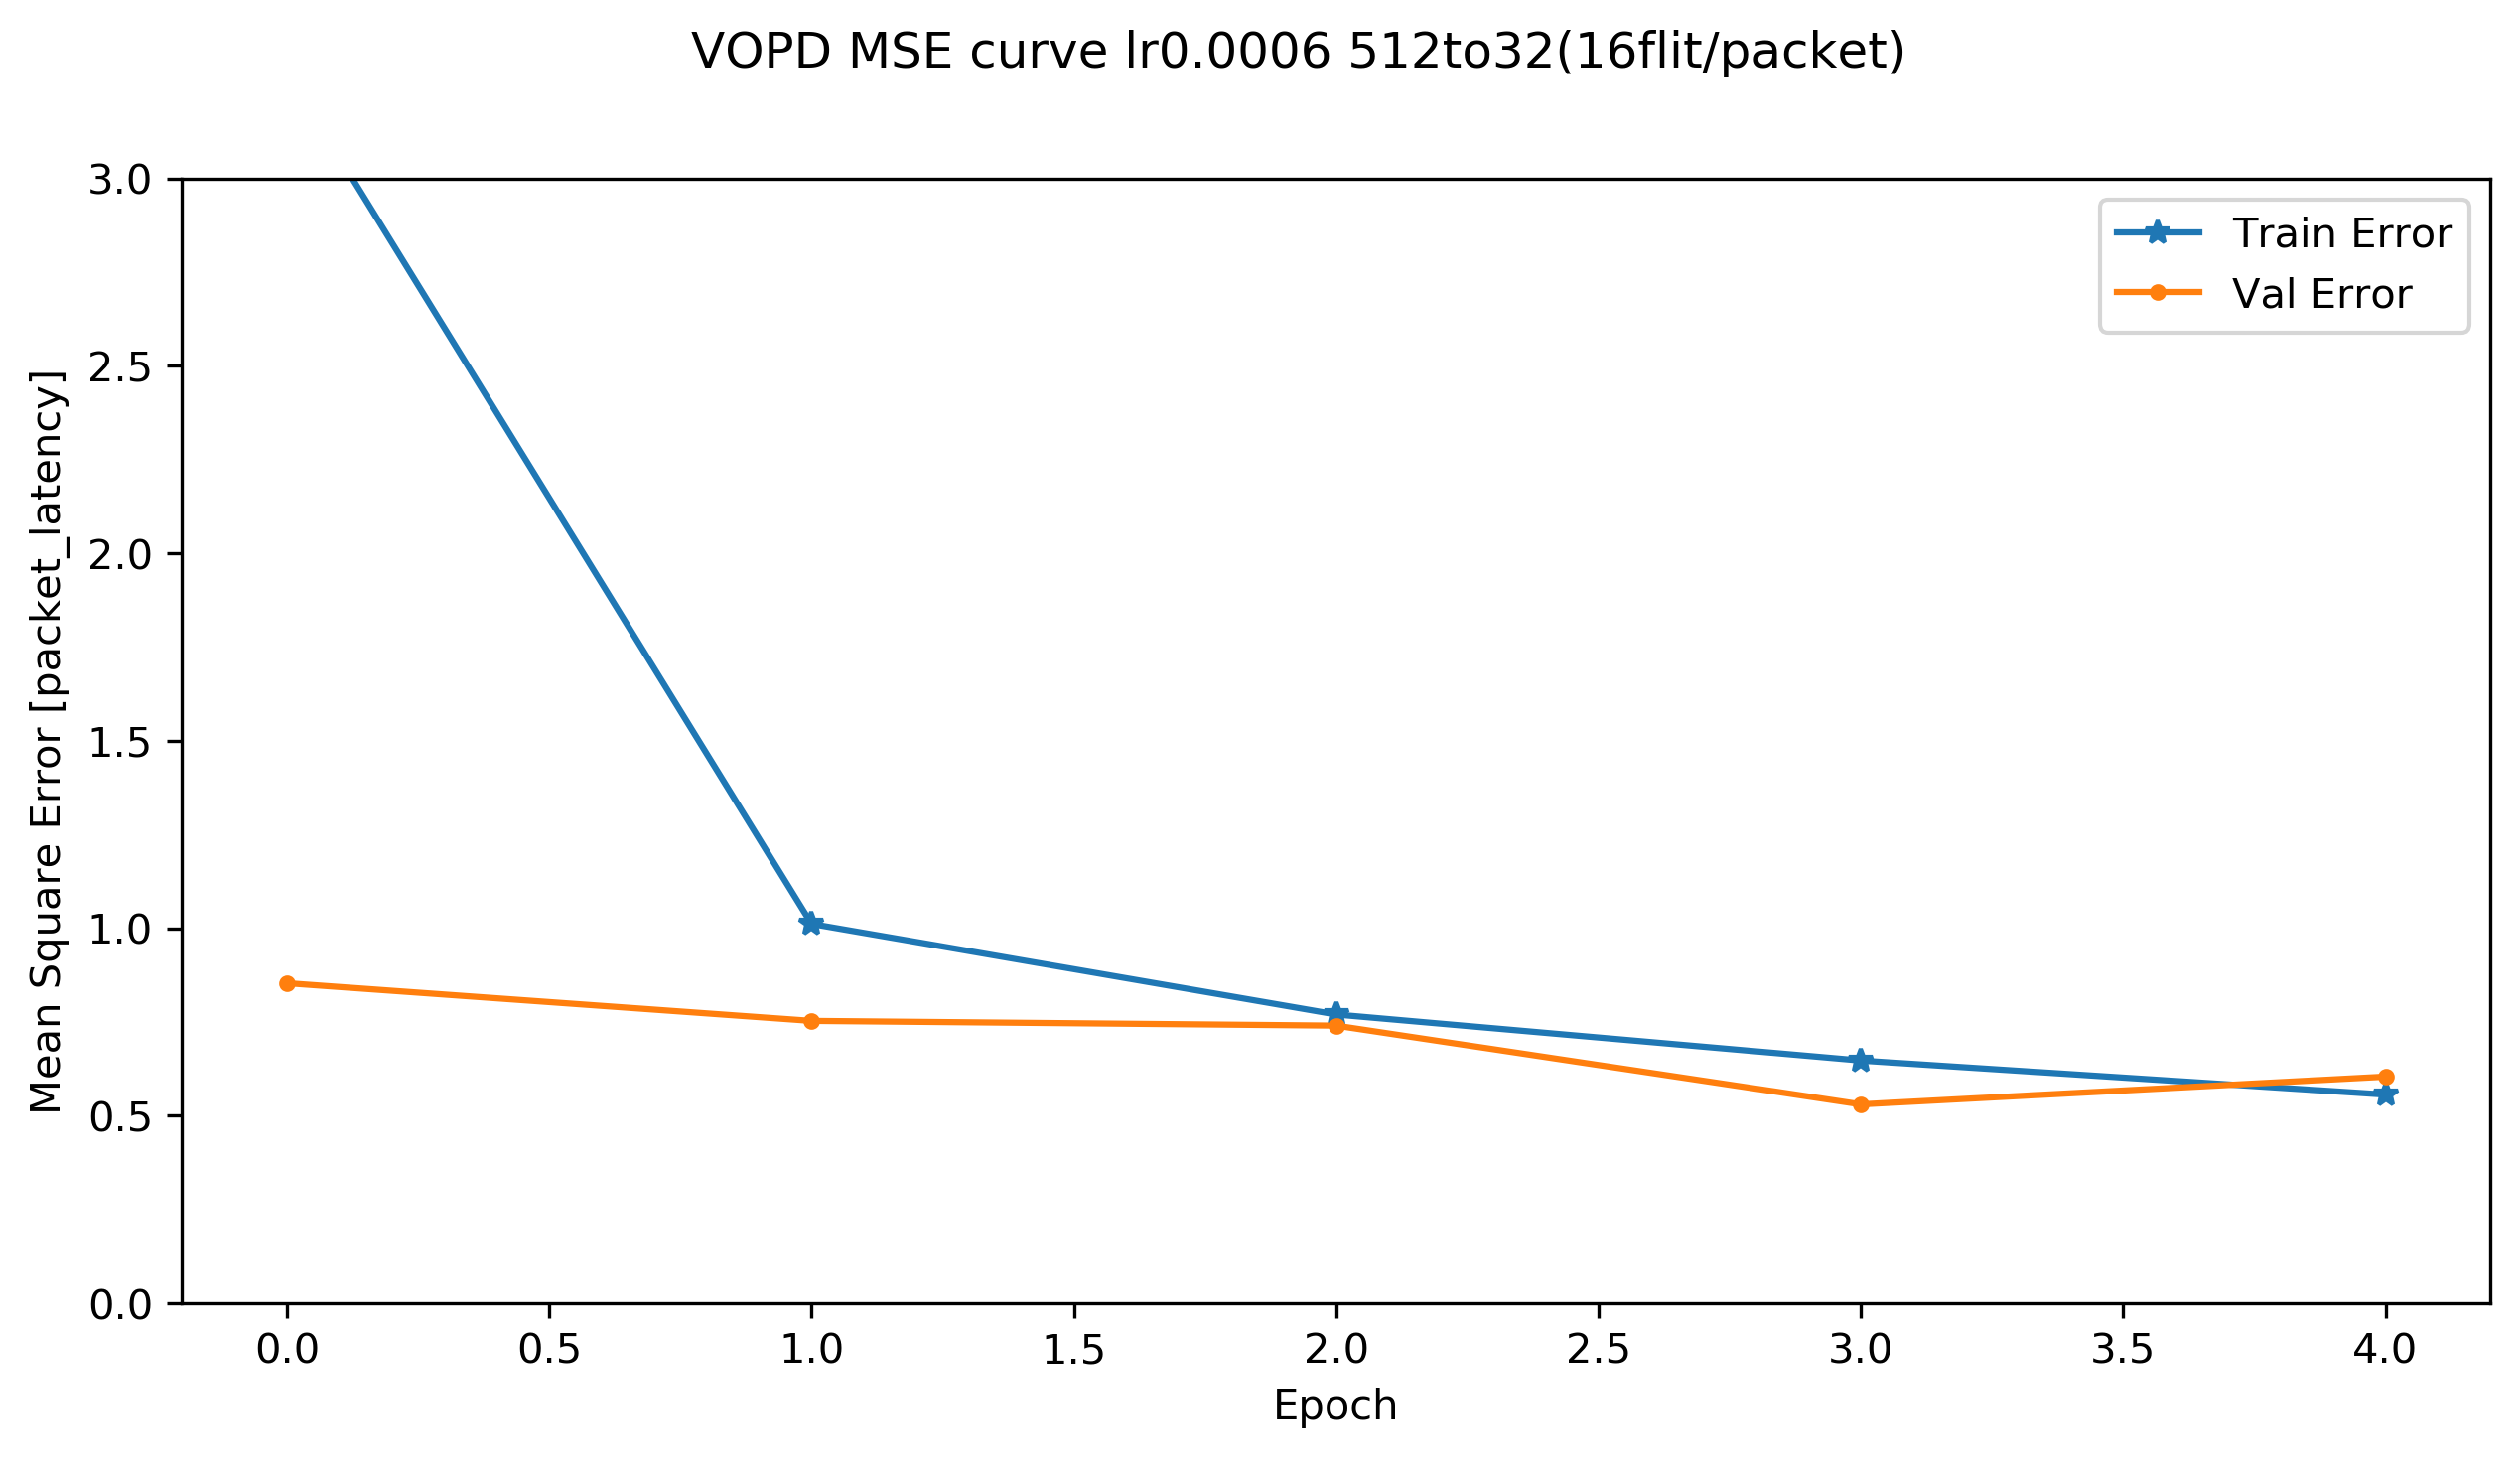

In [14]:
def plot_history(history,lr):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(10, 5),dpi=300)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [packet_latency]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error',marker='*')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error',marker='.')
  plt.ylim([0,3])
  plt.legend()
  plt.suptitle('VOPD MAE curve lr0.0006 512to32(16flit/packet)')
#   plt.savefig('Train_MAE_analy_epoch_lr=0.0006.pdf')  

  plt.figure(figsize=(10, 5),dpi=300)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [packet_latency]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error',marker='*')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error',marker='.')
  plt.ylim([0,3])
  plt.legend()
  plt.suptitle('VOPD MSE curve lr0.0006 512to32(16flit/packet)')
#   plt.savefig('Train_MSE_analy_epoch_lr=0.0006.pdf')
  plt.show()
  


plot_history(history,lr_rate)



In [ ]:
# model.save('saved_models/model1_olddata.h5')

In [15]:
# model = load_model('best_model.h5') 

Y_tr_pred = model.predict(normed_train_data).flatten()
train_MSE = np.sum(np.square(Y_tr_pred-Y_train))/Y_tr_pred.shape[0]
print('train MSE = %f'%(train_MSE))

train MSE = 0.572434


# Testing model with unseen data

In [16]:
test_unseen = pd.read_csv("dataset/updated_model_dataset/vopd_unsat_final1.csv",header=None,error_bad_lines=False)
Y_unseen = test_unseen.iloc[:,-1]
test_unseen.drop(test_unseen.columns[-1],inplace=True,axis=1)
test_unseen.drop(test_unseen.columns[0],inplace=True,axis=1)
test_unseen_norm = norm(test_unseen)

Y_unseen_pred = model.predict(test_unseen_norm).flatten()

unseen data MSE = 11.188618
data size=170000


Text(0.5, 1.0, 'unseen_data_histr')

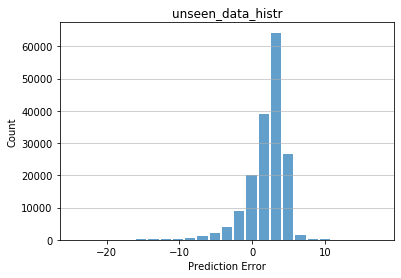

In [17]:
# Y_unseen_norm = np.log10(Y_unseen)
error = Y_unseen_pred-Y_unseen
unseen_data_MSE = np.sum(np.square(error))/Y_unseen.shape[0]

print('unseen data MSE = %f'%unseen_data_MSE)
print('data size=%d'%len(error))
plt.hist(error, bins =25,alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title('unseen_data_histr')
# plt.savefig('unseen_data_hist.jpg')

In [19]:
test_unseen = pd.read_csv("dataset/updated_model_dataset/syn_unsat_sort.csv",header=None,error_bad_lines=False)
test_data = test_unseen
Y_unseen = test_data.iloc[:,-1]

unseen data MSE = 8.481509


Text(0, 0.5, 'Count')

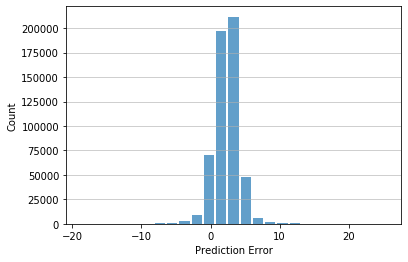

In [20]:
test_data.drop(test_data.columns[-1],inplace=True,axis=1)
test_data.drop(test_data.columns[0],inplace=True,axis=1)
test_unseen_norm = norm(test_data)
Y_unseen_pred = model.predict(test_unseen_norm).flatten()
error2 = Y_unseen_pred-Y_unseen

unseen_data_MSE = np.sum(np.square(error2))/Y_unseen.shape[0]

print('unseen data MSE = %f'%unseen_data_MSE)
plt.hist(error2, bins =25,alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Prediction Error")
plt.ylabel("Count")

In [ ]:
# import pickle
# with open('model_rfr.pkl', 'rb') as f:
#     rf = pickle.load(f)